In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox, Button
from src.model.multilayer_model import MultiLayerFingeringPredictor
from src.data.shape_to_manyhot import shape_to_manyhot
from src.data.chord_label_translator import get_vector_representation
import torch
from src.data.dataset import TorchDataset
from src.display.diagram_mpl import Diagram

In [2]:
def make_suggestion(input_diagram, label):
    x = torch.cat([shape_to_manyhot(input_diagram,
                                   with_mute=True).flatten(),
                  get_vector_representation(label, tensor=True)])
    y_hat = model(x)
    max_tensor = torch.max(torch.unflatten(y_hat, 0, 
                    (-1, model.num_frets)), dim=-1).values
    pred_bin = torch.where(torch.unflatten(y_hat, 0, 
                    (-1, model.num_frets)) == max_tensor[:, None], 1, 0)
    diag = TorchDataset.fingering_from_target_tensor(pred_bin, with_mute=model.with_mute)
    diag = diag[:-1]
    return diag

Sequential(
  (0): Linear(in_features=174, out_features=150, bias=True)
  (1): Linear(in_features=150, out_features=150, bias=True)
)


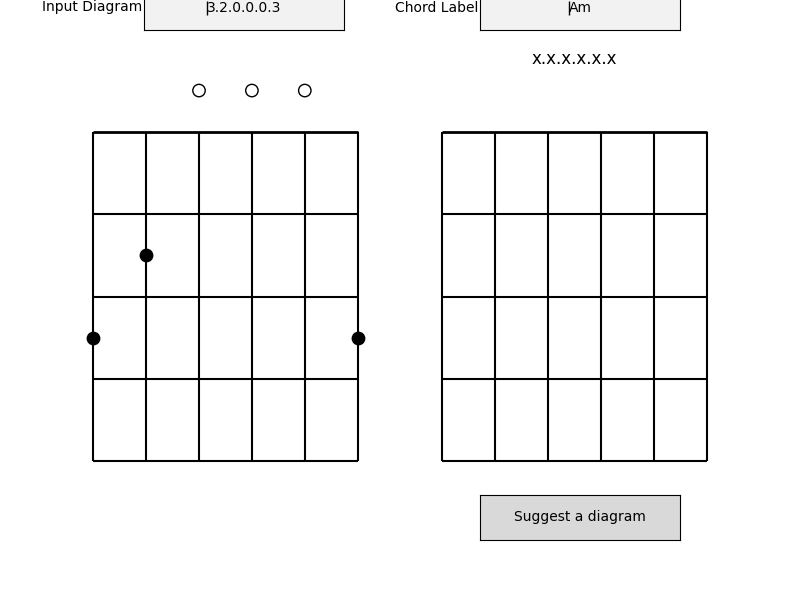

In [3]:
width=4
fig, axs = plt.subplots(1,2,figsize=(width*2, width*1.5))
fig.subplots_adjust(left=0.1, bottom=0.2)
model = MultiLayerFingeringPredictor.load_from_checkpoint('pretrained-models/MSB-1.ckpt')

# previous diagram text box
ax_diag = fig.add_axes([0.18, 0.95, .25, 0.075])
input_diagram_box = TextBox(ax_diag, 'Input Diagram', textalignment='center')
input_diagram_box.set_val('3.2.0.0.0.3')

# Previous Diagram
prev_diag = Diagram(fig=fig, ax=axs[0], textbox=input_diagram_box, interactive=True, diagram=input_diagram_box.text)
prev_diag.show_diagram()

input_diagram_box.on_submit(lambda x : prev_diag.set_diagram(input_diagram_box.text))


# Suggested Diagram
sugg_diag = Diagram(fig=fig, ax=axs[1], show_title=True)

## root fret arrows

#ax_arr_up = fig.add_axes([0, 0.7, 0.05, 0.05])
#arr_up = Button(ax_arr_up, '↑')
#arr_up.on_clicked(lambda x: _shift(input_diagram_box, axs[0], fig, step=-1))
#ax_arr_down = fig.add_axes([0, 0.6, 0.05, 0.05])
#arr_down = Button(ax_arr_down, '↓')
#arr_down.on_clicked(lambda x: _shift(input_diagram_box, axs[0], fig, step=1))

# input label textbox
ax_label = fig.add_axes([0.6, 0.95, .25, 0.075])
input_label_box = TextBox(ax_label, 'Chord Label', textalignment='center')
input_label_box.set_val('Am')

# suggestion button

ax_button = fig.add_axes([0.6, 0.1, 0.25, 0.075])
button = Button(ax_button, 'Suggest a diagram')
button.on_clicked(lambda x: sugg_diag.set_diagram(make_suggestion(input_diagram_box.text, input_label_box.text)))




plt.show()